In [1]:
# a sample k-means clustering algorithm without using libraries

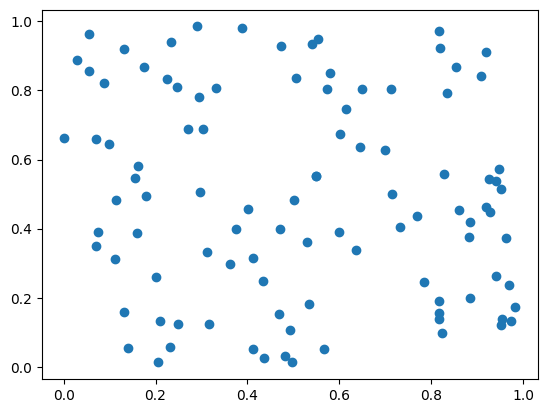

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

# generate random data
data = np.random.rand(100, 2)

# plot the data
plt.scatter(data[:, 0], data[:, 1])

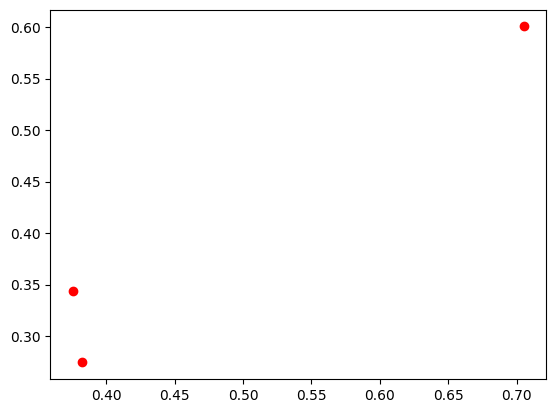

In [3]:
# number of clusters
k = 3

# number of data points
n = data.shape[0]

# generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k, 2)*std + mean

# plot the centers
plt.scatter(centers[:, 0], centers[:, 1], c='r')

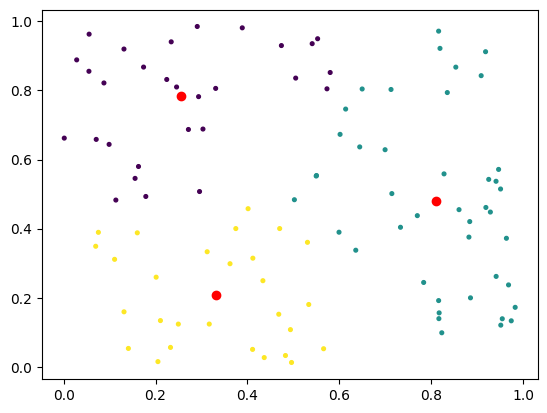

In [4]:
# to store the value of centers when it updates
centers_old = np.zeros(centers.shape)

# to store the value of centers after it updates
centers_new = centers.copy()

# to store the clusters
clusters = np.zeros(n)

# to store the distance between data and centers
distances = np.zeros((n, k))

# calculate the distance between data and centers
def distance(data, centers):
    for i in range(k):
        distances[:, i] = np.linalg.norm(data - centers[i], axis=1)
    return distances

# assign all data to closest center
def assignment(distances):
    clusters = np.argmin(distances, axis=1)
    return clusters

# calculate new centers
def update(k):
    for i in range(k):
        centers[i] = np.mean(data[clusters == i], axis=0)
    return centers

# repeat until convergence
while True:
    distances = distance(data, centers)
    clusters = assignment(distances)
    centers_old = centers_new.copy()
    centers_new = update(k)
    if np.all(centers_new == centers_old):
        break

# plot the data and the centers generated as random
plt.scatter(data[:, 0], data[:, 1], c=clusters, s=7)
plt.scatter(centers_new[:, 0], centers_new[:, 1], c='r')